# Tensorflow Cookbook

## how to see python and tensorflow versions

In [39]:
print( 'hello' )

hello


In [40]:
import sys


print( 'python version: {}'.format( sys.version ) )


python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [41]:
import tensorflow as tf
print( tf.__version__ )

2.12.0


## Check if notebook is running on Google Colab

In [42]:
# method 1.

import sys
IN_COLAB = 'google.colab' in sys.modules

print( 'running on Google Colab: {}'.format( IN_COLAB ) )

running on Google Colab: False


In [43]:
# method 2
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print( 'running on Google Colab: {}'.format( IN_COLAB ) )

running on Google Colab: False


### mount google drive in Colab 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### get current working directory

In [45]:
import os

os.getcwd()

'/home/art/git/tf'

#### measure elapsed time, processing time

In [46]:
import random
import time
from datetime import datetime

start_time = datetime.now()

# your process here
i = random.randint( 1, 4 )
time.sleep( i )

elapsed_time = datetime.now() - start_time

print( 'elapsed time: {}'.format( elapsed_time ) )


elapsed time: 0:00:02.002401


## import libraries

In [47]:
import csv
import io
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import numpy             as np
import os
import pandas
import pickle
import random
import zipfile

from IPython.display import HTML, display
from dataclasses     import dataclass
from scipy.stats     import linregress


In [48]:
import tensorflow     as     tf
from tensorflow       import keras
from keras            import layers
from keras            import Model
from keras.optimizers import RMSprop

### tf keras image libraries

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils               import img_to_array, load_img

### tf Natural Language Processing libraries

In [50]:
from tensorflow.keras.preprocessing.text     import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### tf Time Series and Sequences


In [51]:
# already done in previous box

import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt


## Handling images

### show an image using matplot and keras

* load the image with keras

* show the image with matplot


wild coyote


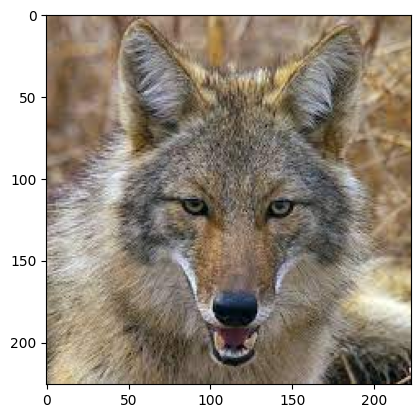

In [52]:
print( 'wild coyote' )
plt.imshow( load_img( '/home/art/Pictures/coyote.jpeg' ) )
plt.show()

### Display multiple images in a grid of 4 x 4

In [53]:
#### libraries

In [54]:

train_dir      = '/home/art/Pictures/cats_and_dogs/train/'
validation_dir = '/home/art/Pictures/cats_and_dogs/validation'

cat_dir        = '/home/art/Pictures/cats_and_dogs/train/cats/'
cat_file_names = os.listdir( cat_dir )

dog_dir        = '/home/art/Pictures/cats_and_dogs/train/dogs/'
catcat_dir     = '/home/art/Pictures/cats_and_dogs/train/cats'
cat_file_names = os.listdir( cat_dir )
dog_file_names = os.listdir( dog_dir )

In [55]:
def plot_grid_of_pix(pic_index, 
                     cat_dir,
                     cat_file_names,
                     dog_dir,
                     dog_file_names,
                     num_rows =4, num_cols = 4, size_inches=4 ):
    
    fig = plt.gcf()
    fig.set_size_inches( num_rows * size_inches, num_cols * size_inches )

    next_cat_pix = [ os.path.join( cat_dir, i )
                     for i in cat_file_names[ pic_index-8 : pic_index ]
                   ]

    next_dog_pix = [ os.path.join( dog_dir, i )
                     for i in dog_file_names[ pic_index-8 : pic_index ]
                   ]

    for i, img_path in enumerate( next_cat_pix + next_dog_pix ):
        sp = plt.subplot( num_rows, num_cols, i + 1 )
        sp.axis( 'Off' )
        img = mpimg.imread( img_path )
        plt.imshow( img )
    plt.show()



#### display the images

In [56]:
pic_index = 0

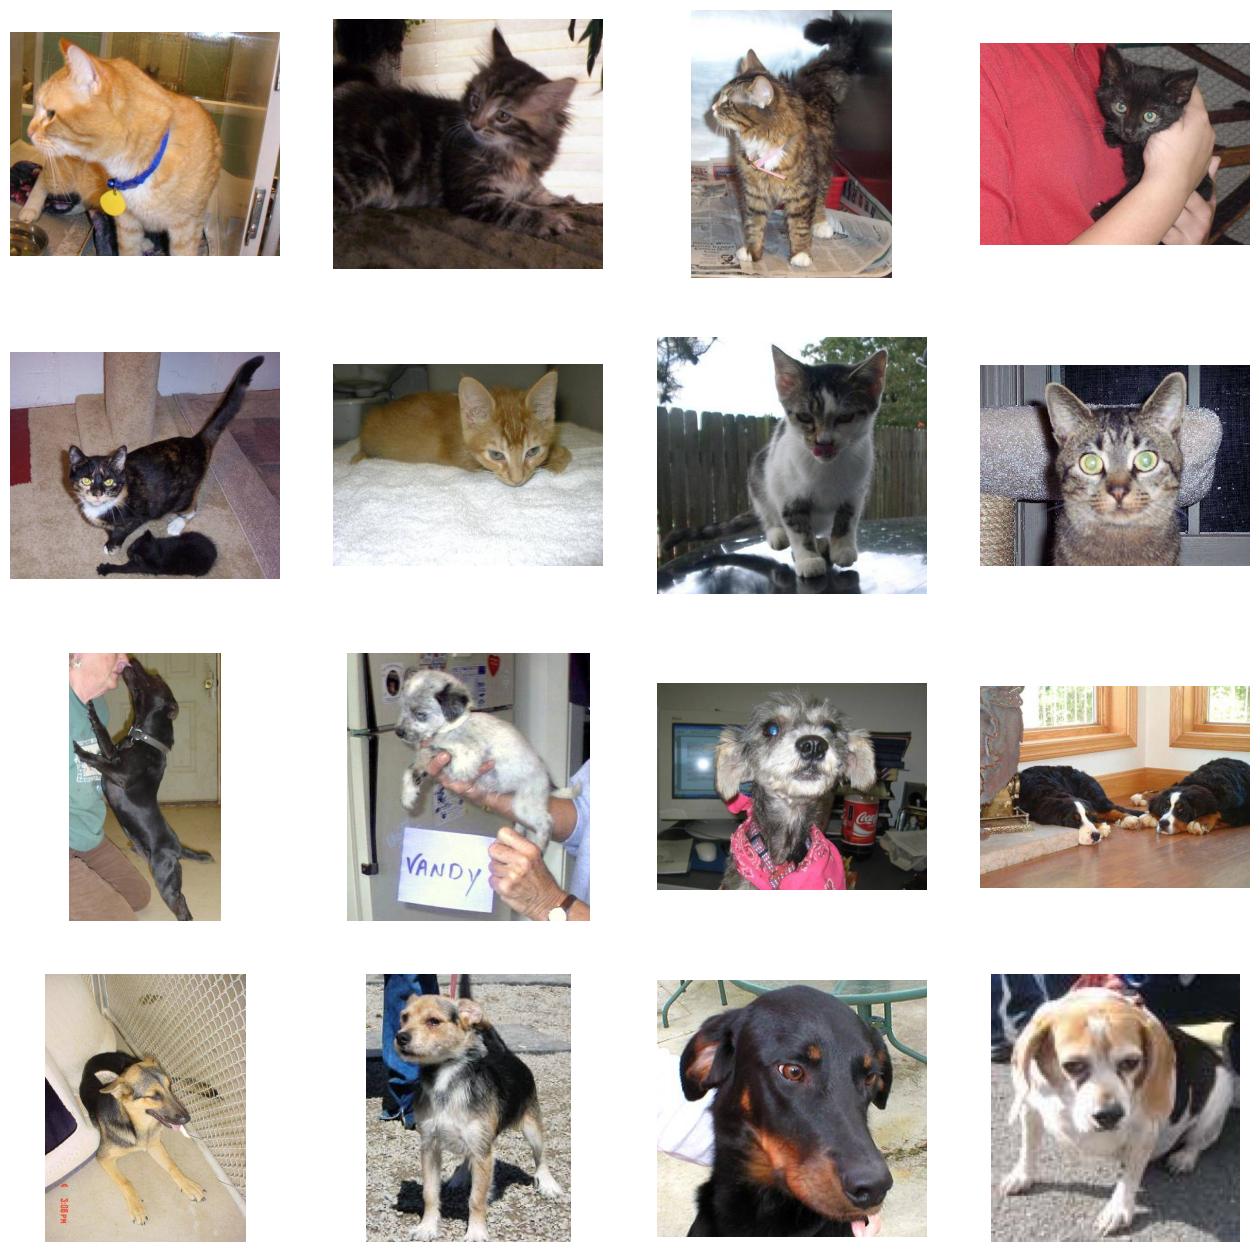

In [57]:

pic_index += 8
plot_grid_of_pix( 
    pic_index, 
    cat_dir,
    cat_file_names,
    dog_dir,
    dog_file_names,                 
    num_rows =4, num_cols = 4, size_inches=4 )


In [58]:
#  plot a grid of pix. We have two categories A and B.

def plot_pix_grid(pic_index, 
                  a_dir,
                  a_file_names,
                  b_dir,
                  b_file_names,
                  num_rows =4, num_cols = 4, size_inches=4 ):
    
    fig = plt.gcf()
    fig.set_size_inches( num_rows * size_inches, num_cols * size_inches )

    next_a_pix = [ os.path.join( a_dir, i )
                     for i in a_file_names[ pic_index-8 : pic_index ]
                   ]

    next_b_pix = [ os.path.join( b_dir, i )
                     for i in b_file_names[ pic_index-8 : pic_index ]
                   ]

    for i, img_path in enumerate( next_a_pix + next_b_pix ):
        sp = plt.subplot( num_rows, num_cols, i + 1 )
        sp.axis( 'Off' )
        img = mpimg.imread( img_path )
        plt.imshow( img )
    plt.show()



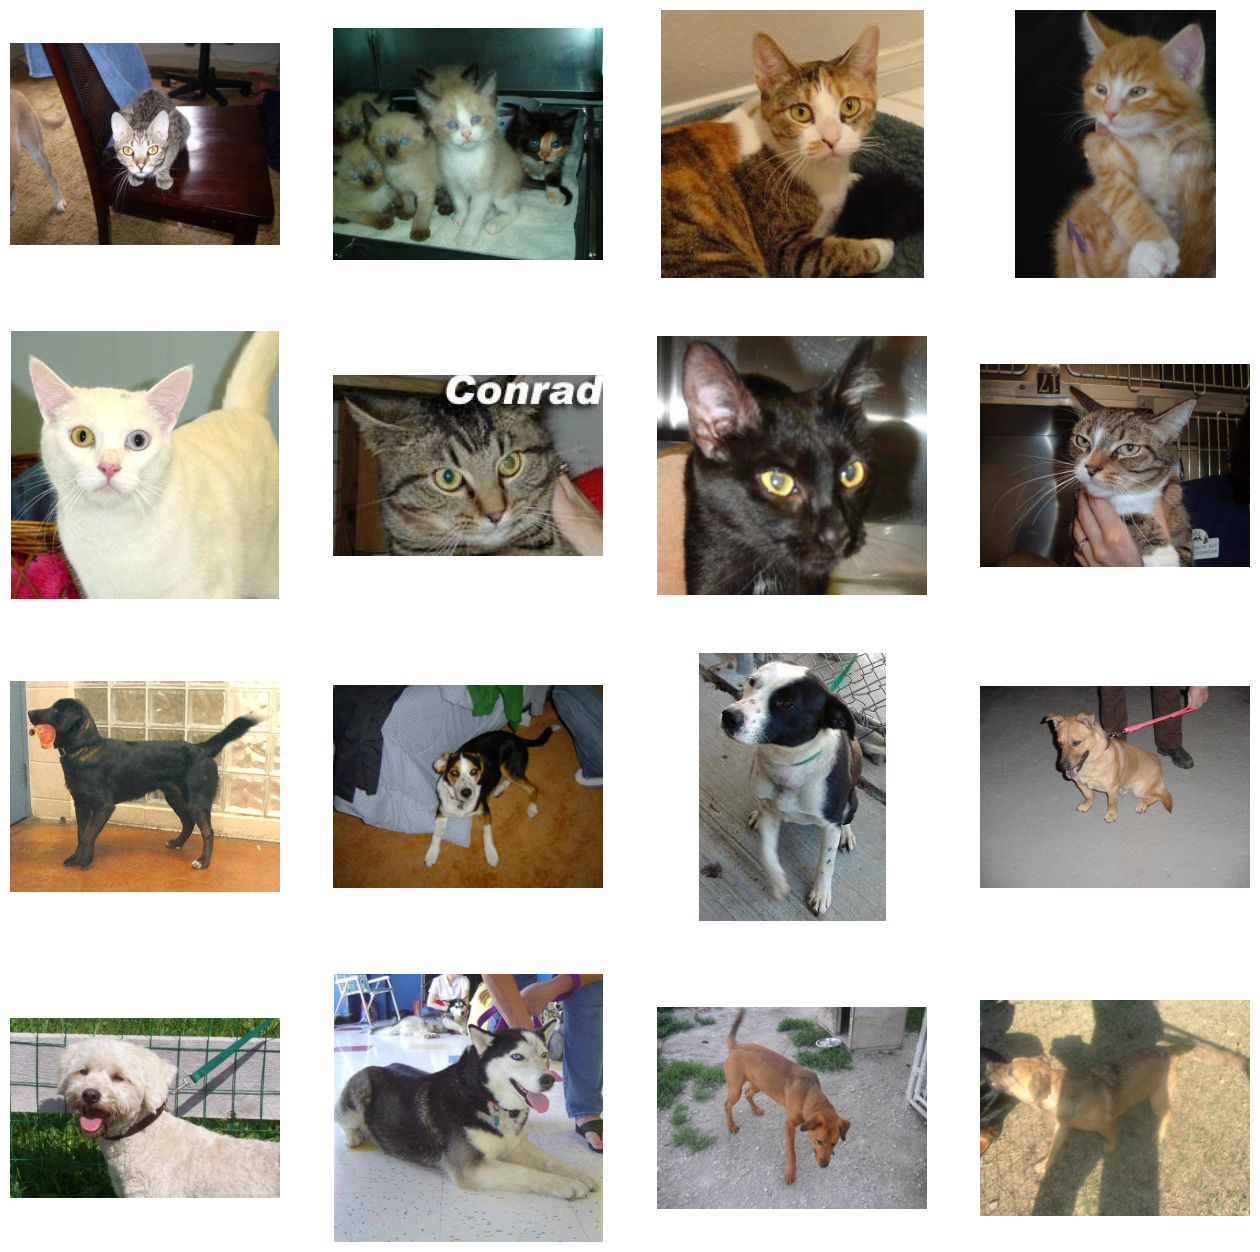

In [59]:

pic_index += 8
plot_pix_grid( 
    pic_index, 
    cat_dir,
    cat_file_names,
    dog_dir,
    dog_file_names,                 
    )

### plot grid of images. One category.

In [60]:

def plot_img_grid(dir       = '.',
                  pic_index =8, 
                  num_rows =4, num_cols = 4, size_inches=4 ):
    
    file_names = os.listdir( dir )
    
    fig = plt.gcf()
    fig.set_size_inches( num_rows * size_inches, num_cols * size_inches )

    next_pix = [ os.path.join( dir, i )
                     for i in file_names[ pic_index-8 : pic_index ]
                   ]


    for i, img_path in enumerate( next_pix ):
        sp = plt.subplot( num_rows, num_cols, i + 1 )
        sp.axis( 'Off' )
        img = mpimg.imread( img_path )
        plt.imshow( img )
    plt.show()


In [61]:
cat_dir     = '/home/art/Pictures/cats_and_dogs/train/cats'


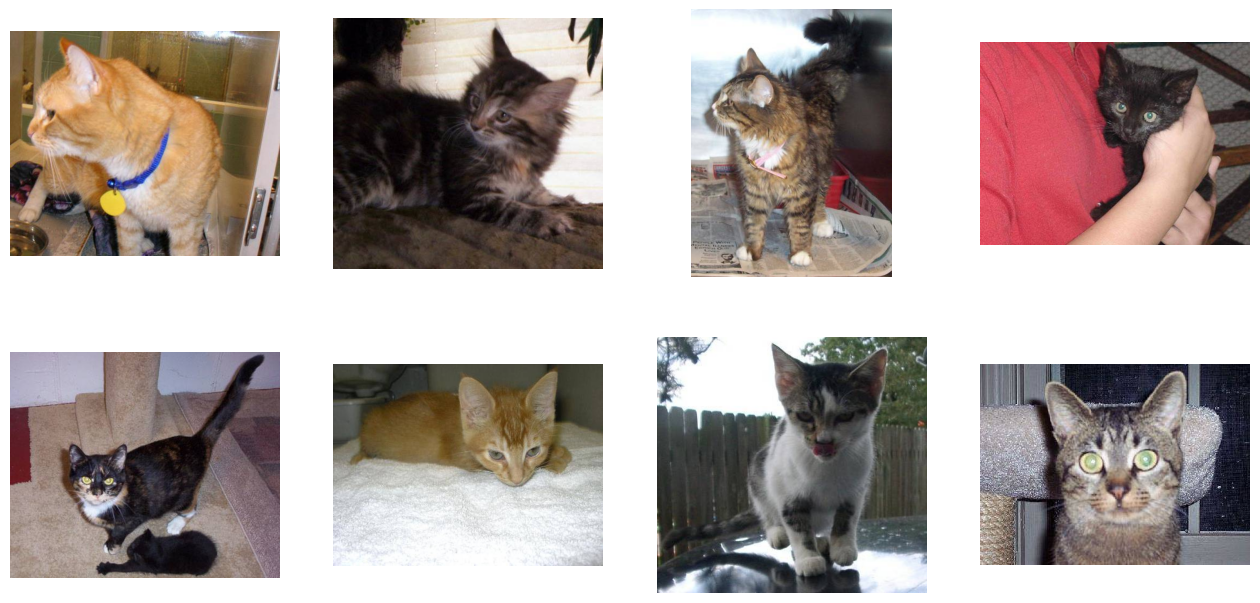

In [62]:
pic_index += 8
plot_img_grid( dir= cat_dir    )

## Load images from directory with ImageDataGenerator

* We load images from directory
* We create one generator for traiming images, and another for validation images.
* We specify class_mode for Binary ( cats and dogs )


type of Image Data Generator flows:
* flow_from_directory
* flow_from_dataframe
    

class modes:
* binary.      ie: cats vs dogs.
* categorical. ie: rock, paper and scissors.
* other.       ie: age, house price.



In [63]:
def get_train_val_generators( train_dir, val_dir ):
    # training image generator
    train_datagen = ImageDataGenerator(
        rescale = 1.0 / 255,
        width_shift_range  = 0.20,
        height_shift_range = 0.20,
        rotation_range     = 40,
        shear_range        = 0.20,
        zoom_range         = 0.20,
        horizontal_flip    = True,
        fill_mode          = 'nearest'
    )
    
    train_generator = train_datagen.flow_from_directory(
        directory   = train_dir,
        target_size = (150, 150),
        batch_size  = 32,
        # class_mode= "categorical", "binary", "sparse", "input", or None.
        class_mode   = 'binary' )

    val_datagen     = ImageDataGenerator( rescale = 1.0 / 255 )
    
    val_generator   = val_datagen.flow_from_directory(
        directory   = val_dir,
        target_size = (150, 150),
        batch_size  = 32,
        class_mode  = 'binary' )
    
    return train_generator, val_generator
    

In [64]:
print( train_dir, '\n' , validation_dir  )

/home/art/Pictures/cats_and_dogs/train/ 
 /home/art/Pictures/cats_and_dogs/validation


In [65]:

train_generator, val_generator = get_train_val_generators( train_dir, validation_dir )
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### how to know the indexes and classes ?

In [66]:
print( train_generator.class_indices )

{'cats': 0, 'dogs': 1}


### Create a callback

* Create a class hinerited from callbacks

* Create an instance of your class

* use that instance in the training step

In [74]:
class MyCallback( tf.keras.callbacks.Callback ):
    
    def on_epoch_end( self, epoch, logs={} ):
        if logs.get( 'accurary' ) >= 0.95 :
            print( 'MyCallBack.on_epoch_end(), reached 99.9 % accuracy, so we stop training now! ' )
            self.model.stop_training = True
    
    

In [75]:
callbacks = MyCallback()

### train the model

* use the train and validation generators
* set epochs
* set callbacks, ususally to stop training
* get the history of the training, to plot loss, accuraccy of training and validation data.


In [ ]:
# very simple training

model.fit( 
    train_generator,
    epochs = 20
)

In [ ]:
steps = params.num_train_img / params.batch_size


history = model.fit(
    
    x               = train_generator,
    validation_data = val_generator,
    steps_per_epoch = steps,
    epochs          = 5,
    verbose         = 2,
    callbaks        = callbacks
)


### training function with generators, param and callback

In [ ]:
def train_model( model, train_generator, val_generator, params, callbacks ):
    steps = params.num_train_img / params.batch_size
    
    start_time = datetime.now()

    history = model.fit(
        train_generator,
        validation_data = val_generator,
        steps_per_epoch = steps,
        epochs          = params.epochs,
        callbacks       = callbacks
    )
    
    elapsed_time = datetime.now() - start_time
    print( 'time used for training: {}'.format( elapsed_time ) )
    
    return history

### Plot loss and accuracy

In [ ]:
# function to graph the loss and accuracy of our model.

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

In [ ]:
# draw graphs

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### save download history

In [4]:
def download_history( file_name = 'history.pkl' ):
  import pickle

  with open( file_name, 'wb') as f:
    pickle.dump(history.history, f)

  import sys
  IN_COLAB = 'google.colab' in sys.modules
    
  if IN_COLAB:
    from google.colab import files    
    files.download( file_name )


In [ ]:
download_history( 'model_01_history.pkl' )

## save download model

### h5 format

use this for a Sequential model

In [ ]:
model.save( 'my_model.h5' )

### save in directory

In [ ]:
# Save your model in the SavedModel format
model.save('saved_model/my_model')

# Compress the directory using tar
! tar -czvf saved_model.tar.gz saved_model/

## Links

* TensorFlow-Developer-Certificate-Guide


https://github.com/PacktPublishing/TensorFlow-Developer-Certificate-Guide/tree/main